# Aufgabe 7.1

Old Faithful ist ein Geysir im Yellowstone National Park in Wyoming:

https://en.wikipedia.org/wiki/Old_Faithful

Im Datensatz oldfaithful.txt sind Längen von 272 aufeinanderfolgenden Ausbrüchen aufgeführt. 

**a) Schätzen Sie denMittelwert der Eruptionsdauern ab und geben Sie ein 95% Vertrauensintervall mit dem vereinfachten Bootstrap-Verfahren im Skript an. Verwenden Sie dazu $1000$ Bootstraps.**

In [10]:
import numpy as np
x = np.loadtxt(r"./data/oldfaithful.txt")
n = np.size(x)
print('Durchschnitt: ', np.mean(x))

nboot = 1000
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))
xbarstar = np.mean(bootstrapsample, axis=0)
d = np.percentile(xbarstar, q=[2.5, 97.5])
print('Vertrauensintervall: ',d)

Durchschnitt:  209.2683823529412
Vertrauensintervall:  [200.89659926 217.47113971]


Das Vertrauensintervall ist also etwa

$$I = [201, 218]$$

**b) Machen Sie dasselbe für den Median.**

In [11]:
print('Median: ',np.median(x))

Median:  240.0


In [14]:
nboot = 1000
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))
xbarstar = np.median(bootstrapsample, axis=0)
d = np.percentile(xbarstar, q=[2.5, 97.5])
print('Vertrauensintervall: ',d)

Vertrauensintervall:  [229.5 246.5]


**c) Schätzen Sie die Wahrscheinlichkeit**

$$ P(|\overline{x}-\mu|>5) $$

**ab.**

Ersetzen Sie zur Abschätzung μ durch den Mittelwert der Daten und x durch
die Bootstraps.

In [19]:
nboot = 1000
tmpdata = np.random.choice(x, n*nboot, replace=True)
bootstrapsample = np.reshape(tmpdata, (n, nboot))
xbarstar = np.mean(bootstrapsample, axis=0) - np.mean(x)
l = np.sum(xbarstar < -5)
u = np.sum(xbarstar > 5)
ratio = (l+u)/nboot

print('Wahrscheinlichkeit: ', ratio)

Wahrscheinlichkeit:  0.254


Die Wahrscheinlichkeit ist also etw 0.25, dass der Durschnitt der Messungen mehr als 5 Einheiten vom wahren Mittelwert abweicht.

# Aufgabe 7.2

Aus der uniformen Verteilung $X \sim Uniform([0, 10])$ soll eine Stichprobe vom Umfang $n$ gezogen werden.

**a) Es sei n = 60. Bestimmen Sie ein symmetrisches Intervall**

$$
I=\left[\mu_{X}-e, \mu_{X}+e\right]
$$

**um den Erwartungswert $μ_X$ so, dass sich das arithmetische Mittel der Stichprobe, also $\bar{X}_{60}$, mit der Wahrscheinlichkeit von 95% in $I$ befindet. Ein solches
Intervall heisst Prognoseintervall.**

*Hinweis: Standardisieren Sie das arithmetische Mittel $\bar{X}_n$ und benützen Sie den Zentralen Grenzwertsatz und $P(\bar{X}_n ∈ I) = 0.95$.*



Für uniforme Verteilungen gilt:

$$E(X) = \mu_X = \frac{a+b}{2} = \frac{0+10}{2} = 5$$

$$\sigma_X = \frac{b-a}{\sqrt{12}} = \frac{5}{\sqrt{3}}$$

Zentraler Grenzwertsatz:

$$\bar{X}_n ~ N(\mu_X, \sigma^2_X/n)$$

Standardisierte Verteilung des arithmetischen Mittels:
    
$$\bar{Z}_n = \frac{\bar{X}_n - \mu_X}{\sigma_X / \sqrt{n}} = \frac{\bar{X}_n -5}{5 / \sqrt{3n}} \sim \mathcal{N}(0,1)$$

Es gilt dann für das gesuchte Intervall $[\mu - e, \mu + e]$:

$$
\begin{aligned} P\left(\mu_{X}-e \leq \overline{X}_{n} \leq \mu_{X}+e\right) &=P\left(-\frac{e}{5 / \sqrt{3 n}} \leq \frac{\overline{X}_{n}-5}{5 / \sqrt{3 n}} \leq \frac{e}{5 / \sqrt{3 n}}\right) \\ &=P\left(-\frac{e}{5 / \sqrt{3 n}} \leq Z_{n} \leq \frac{e}{5 / \sqrt{3 n}}\right) \\ &=\Phi\left(\frac{e}{5 / \sqrt{3 n}}\right)-\Phi\left(-\frac{e}{5 / \sqrt{3 n}}\right) \\ &=0.95 \end{aligned}
$$


Da die Standardnormalverteilung symmetrisch ist, müssen wir nur eine Seite betrachten. $\Phi\left(\frac{e}{5 / \sqrt{3 n}}\right)$ soll also $97.5\%$ der Fläche unter Gesamtkurve entsprechen:

$$
\frac{e}{5 / \sqrt{3 n}}=q_{0.975}=\Phi^{-1}(0.975)=1.96
$$

Also ist

$$
e=\frac{5}{\sqrt{3 n}} \cdot q_{0.975}=\frac{5}{\sqrt{3 \cdot 60}} \cdot 1.96=0.73
$$

Das Intervall ist also 

$$𝐼=[𝜇𝑋−𝑒,𝜇𝑋+0.73] = [5−0.73,5+0.73] = [4.27, 5.73]$$

**b) Umgekehrt: Wie gross muss n gewählt werden, damit e = 0.2 wird?**

$$
\begin{aligned}
e=0.2&=\frac{5}{\sqrt{3 n}} \cdot 1.96 &&\vert \cdot \sqrt{3n} \\
0.2 \cdot \sqrt{3 n} &=  9.8  &&\vert \cdot 5 \\
\sqrt{3 n} &= 49 &&\vert ^2 \\
3n &= 2401 && \vert \cdot \frac{1}{3} \\
n &= 800.\bar{3}
\end{aligned}
$$

**c) Überprüfen Sie a) experimentell, d. h. mit Python : ziehen Sie viele Stichproben (z. B. 200) und zählen Sie, wie viele ausserhalb von $I$ liegen.**

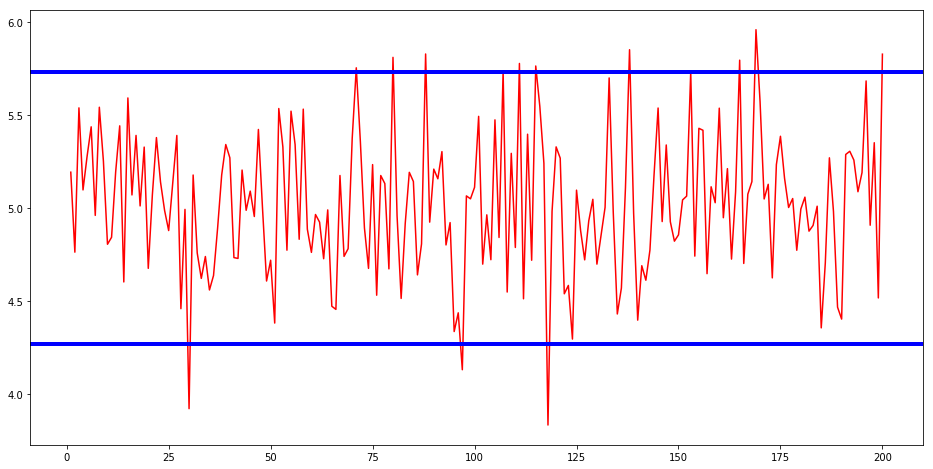

In [46]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['figure.figsize'] = [16, 8]

n = 60 
size = 200 # Anzahl Stichproben

# X_1,...,X_n simulieren und in einer
# n-spaltigen Matrix (mit 200 Zeilen) anordnen
sim = uniform.rvs(size=size*n, loc=0, scale=10)
sim = sim.reshape(size, n)
# In jeder Matrixzeile Mittelwert berechnen
sim_mean = sim.mean(axis=1)
plt.plot(np.arange(1,201,1),sim_mean, 'r')
# Zeichnen Sie mit axhline(y=...) die
# Intervallgrenzen des Prognoseintervalls
# in der obigen Graphik ein.
plt.axhline(y=5.73, linewidth=4, color='b')
plt.axhline(y=4.27, linewidth=4, color='b')
plt.show()

**Stichproben ausserhalb des Intervalls**

Erwartet werden etwa $0.05 \cdot 200 = 10$:

In [44]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
n = 60
sim = uniform.rvs(size=200*n, loc=0, scale=10)
sim = sim.reshape(200, n)
d = np.sum(sim_mean>5.73) + np.sum(sim_mean<4.27)
print("Stichproben ausserhalb des Intervalls: ",d)

Stichproben ausserhalb des Intervalls:  12


# Aufgabe 7.3

Aufgrund langjähriger Untersuchungen ist bekannt, dass der Bleigehalt $X$ von gewissen Bodenproben annähernd normal-verteilt ist

$$
X \sim \mathcal{N}\left(\mu, \sigma^{2}\right)
$$

**a) Es wurden in 10 Bodenproben der Bleigehalt $X$ gemessen. Dabei wurde ein Mittelwert von $\bar{x}_{10} = 31$ ppb erhalten. Die Standardabweichung sei bekannt und beträgt 6 ppb.**

**Geben Sie das zweiseitige 99% Vertrauensintervall für den Mittelwert an.**

Der Bleigehalt ist (annähernd) normalverteilt:

$$
X_{i} \sim \mathcal{N}\left(\mu, \sigma^{2}\right)
$$

Der wahre Mittelwert $\mu$ ist nicht bekannt. $\overline{X}_n$ ist ebenfalls normalverteilt:

$$
\overline{X}_{n} \sim \mathcal{N}\left(\mu, \sigma^{2} / n\right)
$$


In unserem Fall ist also $\overline{X}_{10}$ normalverteilt mit Varianz $\sigma^2 / n = \frac{36}{20} = 3.6$ und $\mu$ unbekannt.

In [ ]:
# TODO

**b) Wie viele Beobachtungen sind nötig, um die Breite des in Teilaufgabe a) bestimmten
zweiseitigen Vertrauensintervalls auf die Hälfte zu reduzieren?**

Wie viele (unabhängige) Bestimmungen des Bleigehalts müssen geplant werden,
falls der Bleigehalt mit einer Stichprobe „1 ppb genau” bestimmt werden
soll, d. h., wenn die Breite des 99% des Konfidenzintervalls nicht grösser als
1 ppb sein soll?

In [ ]:
# TODO

**c) Normalerweise ist die Standardabweichung s unbekannt. Um welchen Faktor
verändert sich die Breite des zweiseitigen Vertrauensintervalls in Teilaufgabe a),
wenn man die Standardabweichung aus den Daten geschätzt hat, also $\hat{\sigma} = 6$ ?**

In [48]:
from scipy.stats import norm, t
import numpy as np
t.interval(alpha=0.99, df=9, loc=31, scale=6/np.sqrt(10))

(24.833870595963425, 37.166129404036575)

Für $\hat{\sigma} = 6$, $n = 10$ und $\overline{x}_{10} = 31$ ergibt sich das Vertrauensintervall $[24.8, 37.2]$.

Das Vertrauensintervall ist um 26% grösser geworden.

# Aufgabe 7.4

Im National Bureau of Standards (USA) wurden regelmässig Wägungen des 10-Gramm-Standardgewichtstücks durchgeführt. Bei 9 Wägungen erhielt man als durchschnittliche Differenz −403 Mikrogramm vom 10 Gramm-Sollgewicht und eine Standardabweichung von 3.127 Mikrogramm für eine einzelne Wägung.

Gegeben: $n=9,\overline{x}_n=-403\mu g,\hat{\sigma}_x=3.127\mu g$

**a) Geben Sie das exakte, zweiseitige 95%-Vertrauensintervall für die wahre Differenz
an, unter der Annahme, dass die Messfehler normal-verteilt sind.**

$X \sim \mathcal{N}(\mu, \sigma_x^2), \alpha=95\%$

Wahres $\sigma$ unbekannt $\rightarrow$ t-Verteilung:

$$ I = \Big[ \overline{x}_n + z_{\frac{1-\alpha}{2}} \cdot \frac{\hat{\sigma}_x}{\sqrt{n}}, \overline{x}_n + z_{\alpha+\frac{1-\alpha}{2}} \cdot \frac{\hat{\sigma}_x}{\sqrt{n}}  \Big] $$$$ z_{\frac{1-\alpha}{2}} = z_{0.025}, z_{\alpha+\frac{1-\alpha}{2}} = z_{0.975} $$

In [53]:
from scipy.stats import t

n = 9
alpha = 0.95

z0025 = t.ppf(q=(1-alpha)/2, df=n-1)
z0975 = t.ppf(q=alpha+(1-alpha)/2, df=n-1)
print('{:.3f}, {:.3f}'.format(z0025, z0975))

-2.306, 2.306


$$ \pm 2.306 \cdot \frac{\hat{\sigma}_x}{\sqrt{n}} = 2.306 \cdot \frac{3.127\mu g}{\sqrt{9}} = \pm 2.404 \mu g $$

In [52]:
from math import sqrt

t.interval(alpha=0.95, df=8, loc=-403, scale=3.127/sqrt(9))

(-405.40362497674977, -400.59637502325023)

$$ \underline{\underline{I = [-405.4 \mu g, -400.6 \mu g]}} $$

**b) Könnte die wahre Differenz −400.0 μg betragen? Entscheiden Sie aufgrund des Resultats in Aufgabe a). (Kurze Begründung)**

Da $-400.0\mu g$ nicht in einem Vertrauensintervall von $95\%$ liegt, würde die Nullhypothese $H_0$ zugunsten der Alternativhypothese $H_A$ verworfen werden.

Die Wahrscheinlichkeit, dass die wahre Differenz $-400.0\mu g$ beträgt, liegt ca. bei $1\%$:

$$ 403\mu g - 400\mu g = 3 \mu g$$$$ z \cdot \frac{3.127\mu g}{\sqrt{9}} = 3 \mu g \Leftrightarrow z = \frac{3\mu g\sqrt{9}}{3.127\mu g} $$

In [54]:
z = (3 * sqrt(9)) / 3.127
1-t.cdf(x=z, df=8)

0.010284811560763774

# Aufgabe 7.5

Eine Brücke soll aufgrund des höheren Verkehrsaufkommens renoviert werden. Im
Bau wurden damals Schrauben mit einer mittleren Festigkeit von $500N/mm^2$ benutzt.
Da dies für nicht mehr sicher genug gehalten wird, sollen diese nun durch
Schrauben mit einer mittleren Festigkeit von mehr als $500N/mm^2$ ersetzt werden.
Um diesen Anforderungen gerecht zu werden, hat der alte Schraubenlieferant ein
neues Verfahren entwickelt. Zur Baustelle werden allerdings unbeschriftete Schrauben
geliefert, aus denen nicht sofort hervorgeht, ob es sich um die alten 500er oder
um die neuen verbesserten Schrauben handelt.
Vor dem Verbau will der leitende Ingenieur zuerst sicherstellen, dass es sich um die
besseren Schrauben handelt. Um dies herauszufinden, werden einige der Schrauben
vermessen und ein statistischer Test durchgeführt. Je nach Ergebnis sollen die Schrauben
verbaut oder zurückgeschickt werden.

```
Schraubenfestigkeit (Xi): 520, 512, 499, 524, 505
```

Für den empirischen Mittelwert und empirische Varianz ergeben sich bei obiger Stichprobe $\overline{x}_5 = 512$ und $s^2_x = 106.5$.

Wir modellieren die Daten mit einer Normalverteilung, d. h. $Xi i.i.d. ∼ N(μ, \sigma^2)$.

**a) Stellen Sie die geeigneten Null- und Alternativhypothesen auf und begründen Sie Ihre Wahl.**

* $H_0: \mu = 500$
* $H_A: \mu > 500$

Wir wollen vermeiden, Schrauben fälschlicherweise als neue Schrauben zu bezeichen. Deshalb wird dieser Fall zum Fehler erster Art.

Es wird ein einseitiger Test durchgeführt, da uns nur interessiert, ob $\mu$ *grösser* als 500 ist. Deshalb führen wir einen einseitigen Test durch.

**b) Sie führen nun einen einseitigen t-Test zum Niveau $\alpha = 0.05$ durch (unabhängig von Ihrer obigen Antwort). Stellen Sie die Teststatistik $T$ auf und berechnen Sie deren Wert. Geben Sie die Verteilung der Teststatistik $T$ unter $H_0$ und den Verwerfungsbereich des Tests an. Was ist der Testentscheid?**

In [70]:
import numpy as np
from scipy.stats import norm, t
from pandas import Series

x = Series([520, 512, 499, 524, 505])

print("Mittelwert:\t", x.mean())
print("Varianz:\t", x.var())
print()

d = t.ppf(q=0.95, df=x.size-1, loc=500, scale=x.std()/np.sqrt(x.size))

print("Verwerfungsbereich:\t[%.1f, ∞)" % d)

Mittelwert:	 512.0
Varianz:	 106.5

Verwerfungsbereich:	[509.8, ∞)


Der Wert $\overline{x}_5 = 512$ liegt im Verwerfungsbereich. Die Nullhypothese wird also verworfen.

Die Schrauben sind statistisch signifikant stärker.

*Bonus: Berechung von Hand*

Teststatistik:

$$
T=\sqrt{n} \frac{\overline{X}_{n}-\mu}{\hat{\sigma}}=\sqrt{5} \frac{\overline{X}_{n}-500}{\hat{\sigma}}
$$

Empirischer Mittelwert:

$$
\overline{x}_5 = 512
$$

Empirische Varianz:

$$
\sigma^2 = \frac{1}{4}\sum_{i=1}^5(x_i-\overline{x}_5)^2 = 106.5
$$

Daraus ergibt sich:

$$
t= \frac{512-500}{\sqrt{106.5 / 5}} \approx 2.6
$$

T ist t-verteilt mit 4 Freiheitsgraden.

In [72]:
from scipy.stats import t
p = t.ppf(q=0.95, df=4)
print("p-Wert:", p)

p-Wert:  2.13184678133629


Die Nullhypothese wird demnach abgelehnt.

**c) Berechnen Sie ein (zweiseitiges) 95%-Vertrauensintervall für $μ$.**

$$
\mathrm{VI} :=\left[\overline{x}_{5}-\frac{\hat{\sigma} t_{n-1 ; 1-\alpha / 2}}{\sqrt{5}} ; \overline{x}_{5}+\frac{\hat{\sigma} t_{n-1 ; 1-\alpha / 2}}{\sqrt{5}}\right]
$$

In [77]:
t.interval(alpha=0.95, df=x.size-1, loc=x.mean(), scale=x.std()/np.sqrt(x.size))

(499.1861719188852, 524.8138280811148)

In [78]:
t.ppf(q=[0.025,0.975], df=x.size-1, loc=x.mean(), scale=x.std()/np.sqrt(x.size))

array([499.18617192, 524.81382808])

Das Vertrauensintervall ist also $VI \approx [499.1862,524.8138]$.

**d) Wie würde das entsprechende Vertrauensintervall von c) aussehen, wenn wir die Streuung als bekannt voraussetzen würden (mit dem gleichen Wert wie der beobachtete)?**

$$
\mathrm{VI} :=\left[\hat{\mu}-\frac{\sigma z_{1-\alpha / 2}}{\sqrt{5}} ; \hat{\mu}+\frac{\sigma z_{1-\alpha / 2}}{\sqrt{5}}\right]
$$

In [79]:
norm.interval(alpha=0.95, loc=x.mean(), scale=x.std()/np.sqrt(x.size))

(502.95438930304954, 521.0456106969505)

In [80]:
norm.ppf(q=[0.025,0.975], loc=x.mean(),
scale=x.std()/np.sqrt(x.size))

array([502.9543893, 521.0456107])

Das Vertrauensintervall wäre also $VI \approx [502.9544,521.0456]$.

**e) Betrachten Sie (unabhängig von dem oben aufgeführten Beispiel) einen einseitigen t-Test von $H_0 : μ = 0$ gegen $H_A : μ > 0$ zum Niveau $\alpha = 0.05$.**

Obwohl die beobachteten $n$ Datenpunkte einen empirischen Mittelwert grösser Null haben, ergeben die Berechnungen, dass die Nullhypothese nicht verworfen wird.

Entscheiden Sie, ob folgende Aussagen wahr oder falsch sind.

| Aussage | Richtig | Falsch |
| --- |:---:|:---:|
| Man verwirft $H_0$ für kein Niveau $\alpha < 0.05$| x | |
| Es gibt ein Niveau $\alpha < 1$, bei dem man $H_0$ verwirft | x | |
| Der $p$-Wert ist strikt kleiner als 0.5 | x | |
| Führt man statt einese einseitigen einenn zweiseitigen Test zum Niveau 0.05 durch, verwirft man $H_0$ nicht | x | |
| Wenn man die Daten immer öfter kopiert (d. h., man betrachtet jeden Datenpunkt $k$-Mal, so dass man insgesamt $k · n$ Datenpunkte erhält), verwirft man $H_0$ für ein grosses $k$ beim Niveau 0.05. | x | |